# Predicting customers who have churned

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../input/credit-card-customers/BankChurners.csv')

In [3]:
# Dropping the last two columns and the client number column
df = df.iloc[:, :-2]

# Checking for the number of null values present in each feature
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [4]:
# Changing the Attrition_Flag to 0 and 1 (Hidden Input/Output)
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

# Data Explorarion

> - **`CLIENTNUM`** : Unique client identifier.
> - **`Attrition_Flag`** : Indicates whether the customer's account is active or has churned.
> - **`Customer_Age`** : Age of the customer.
> - **`Gender`** : Gender of the customer.
> - **`Dependent_count`** : Number of dependents of the customer.
> - **`Education_Level`** : Educational level of the customer.
> - **`Marital_Status`** : Marital status of the customer.
> - **`Income_Category`** : Income category of the customer.
> - **`Card_Category`** : Category of the credit card held by the customer.
> - **`Months_on_book`** : Number of months the customer has been a bank client.
> - **`Total_Relationship_Count`** : Total number of bank products held by the customer.
> - **`Months_Inactive_12_mon`** : Number of months with inactivity in the last 12 months.
> - **`Contacts_Count_12_mon`** : Number of contacts with the bank in the last 12 months.
> - **`Credit_Limit`** : Credit limit on the credit card.
> - **`Total_Revolving_Bal`** : Total revolving balance on the credit card.
> - **`Avg_Open_To_Buy`** : Average open to buy credit line on the credit card.
> - **`Total_Amt_Chng_Q4_Q1`** : Change in transaction amount over the last four quarters.
> - **`Total_Trans_Amt`** : Total transaction amount in the last 12 months.
> - **`Total_Trans_Ct`** : Total transaction count in the last 12 months.
> - **`Total_Ct_Chng_Q4_Q1`** : Change in transaction count over the last four quarters.
> - **`Avg_Utilization_Ratio`** : Average utilization ratio of the credit card.

In [5]:
fig = px.pie(df, names='Attrition_Flag', 
             title='Attrition Flag Distribution',
             color_discrete_sequence=['#ff7f0e', '#3498db'],# Setting custom color
            )

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))


# Show the pie chart
fig.show()

## Exploring Categorical Features

/tmp/ipykernel_18/554113280.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_18/554113280.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_18/554113280.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_18/554113280.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_18/554113280.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




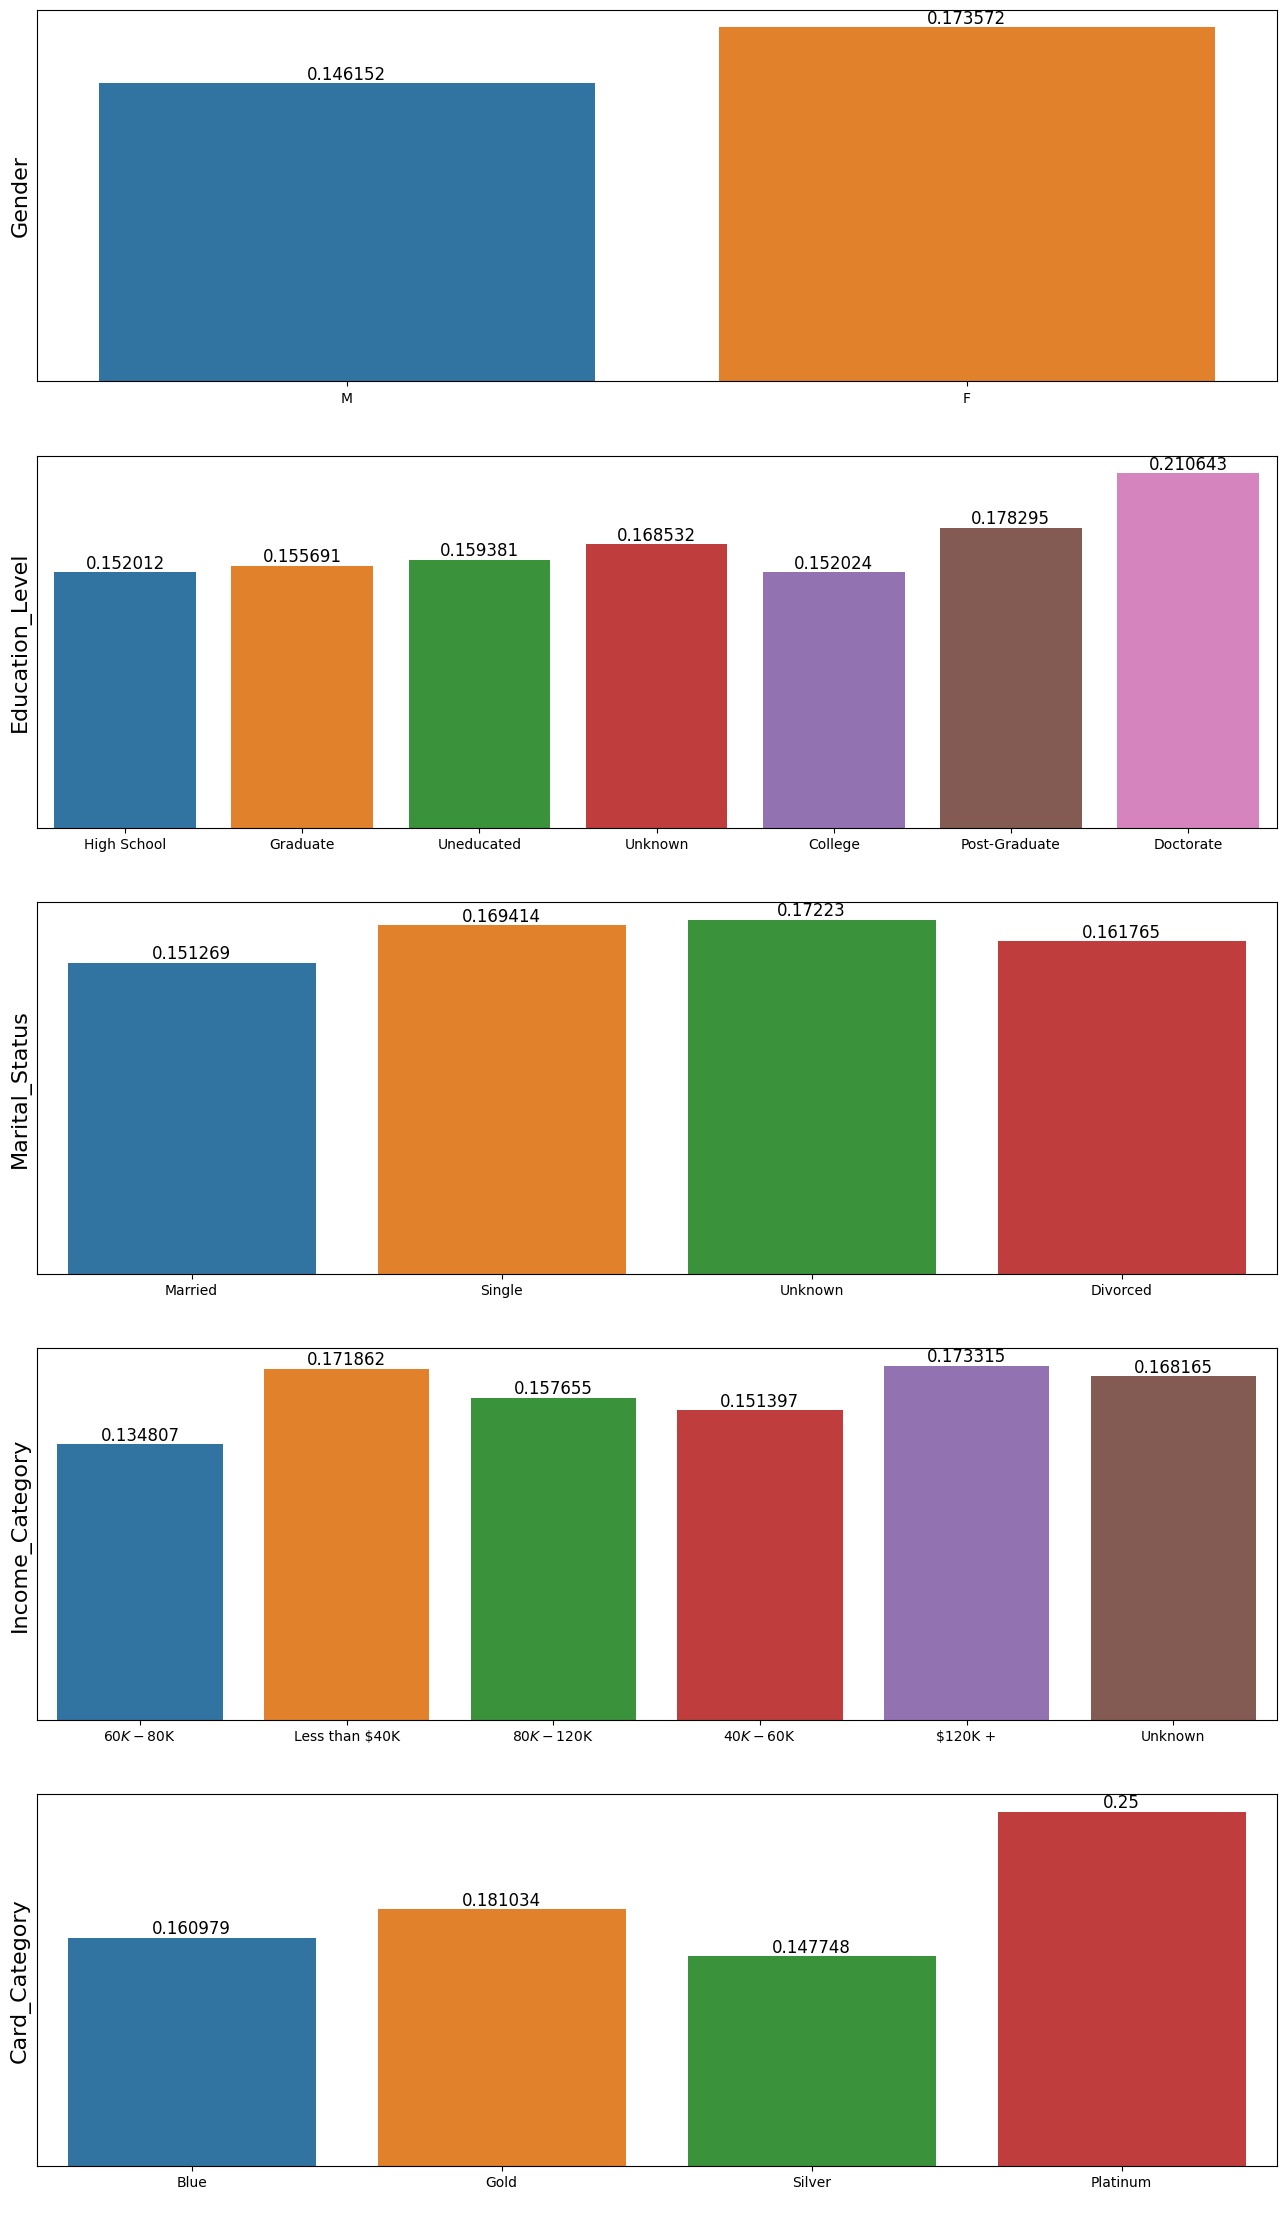

In [6]:
num_cols = list(df.select_dtypes(["int64","float64"]))
cat_cols = list(df.select_dtypes("object"))

fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(16, 28))
                
i = 0 #counter

for cols in cat_cols:
    
    sns.barplot(x=df[cols], y=df['Attrition_Flag'], fill=True, alpha=1, ci=None, ax=ax[i])
                
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(cols, fontsize=16)
    ax[i].tick_params(left=False, labelleft=False)    
    ax[i].bar_label(ax[i].containers[0], size="12")
    i=i+1
    
      
plt.show()

## Exploring Numerical Features